In [1]:
import numpy as np
import gym
from successor_representation.environments import GridWorld
from successor_representation.agents import SRRandomAgent, SRQLearningAgent, TabularCountsAgent
from successor_representation.utils import run_episodic, run_non_episodic, plot_heatmap, plot_sr_heatmap, plot_state_visitation_heatmap
from copy import deepcopy
from collections import Counter
from matplotlib import colors
import matplotlib.pyplot as plt
from collections import OrderedDict
from IPython.display import clear_output
%matplotlib inline

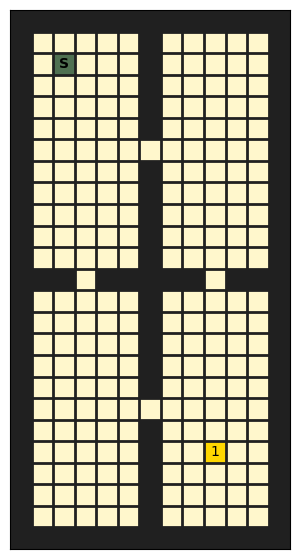

In [2]:
layout = np.loadtxt("../environments/gridworld_layouts/four_rooms.txt", comments="//", dtype=str)
env = GridWorld(layout, init_coords=[(2, 2)], terminal_coords=[(20, 9)], reward_coords={(20, 9): 1}, stochasticity=0., default_reward=-0.01)
env.name = "four_rooms"
env.reset()
env.render()

Learning the SR with TD learning:

$$\mathbf{\Psi}_\pi $$


von-Neumann series computation of SR:
$$\mathbf{\Psi}_\pi = \sum^\infty_{t=0}\left(\gamma \mathbf{P}_\pi\right)^t = \left(\mathbf{I}-\gamma \mathbf{P}_\pi\right)^{-1}$$

In [3]:
agent = SRRandomAgent(env.num_valid_states)
buffer, _, epi_steps = run_episodic(agent, env=env, num_episodes=100, save=False)

In [33]:
from collections import defaultdict


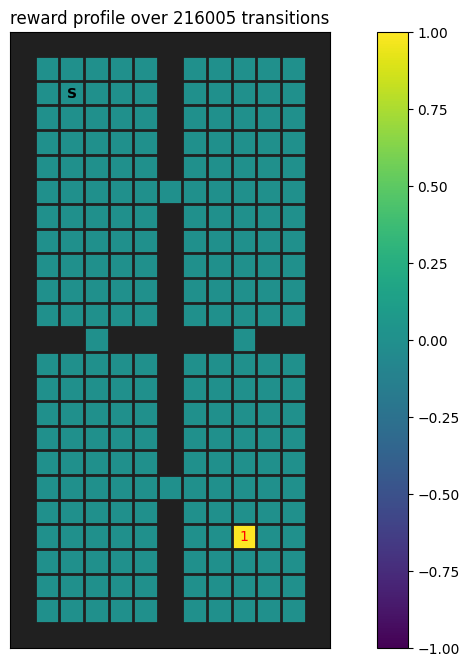

In [34]:
plot_reward_profile(buffer, env, "reward")

Reward stats to compute

- Smoothed variance of reward over last n steps for each state
- Mean reward for buffer at each state.